<a href="https://colab.research.google.com/github/Sunflower47/Portfolio/blob/main/The_method_of_least_squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание

Реализовать метод наименьших квадратов

#Код

##Импорт библиотек

In [5]:
import numpy as np
import matplotlib.pyplot as plt


##Значения функции y в точках x

In [32]:
x = np.array([-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3])
y = np.array([-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90])

##Задание массива: 1, x<sup>1</sup> , ... , x<sup>n</sup>


In [33]:
def design(x, n):             
  dm = np.zeros(n+1)
  for i in range(n+1):
    dm[i] = x**i
  return dm

##Вычисление коэффициентов полинома степени m для P<sub>m</sub> = a<sub>0</sub> + a<sub>1</sub>x + ... + a<sub>m</sub>x<sup>n</sup>

In [27]:
def const(m):           
  D = [0]*len(x)
  for i in range(len(D)):
    D[i] = design(x[i], m)

  d = np.transpose(D)
  C = np.linalg.inv(d@D)@d@y
  return C

##Ищем оптимальное m, при котором среднеквадратичное отклонение начинает расти

12
[7.495379555555556, 4.450215866706205, 2.453426997579178, 0.012470899099731739, 0.012460407583509968, 0.012600059280330731, 0.011590813700606575, 0.01228904175643667, 0.011569371524735512, 0.012931045182099185, 0.014257919624093887, 0.005380189313639674, 0.027662324217839648, 393.9822688719077, 988.5556846798002]


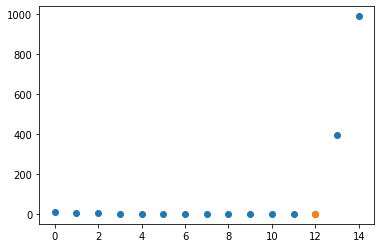

In [9]:
m = len(x)
s = [0]*m

for j in range(m):
    for i in range(len(x)):
      s[j] = s[j] + (np.dot(design(x[i], j), const(j)) -y[i])**2
    s[j] = s[j]/(len(x)- j) 
plt.scatter(range(len(s)), s)

for i in range(len(s)-1):
  if s[i+1] - s[i] > 10 :
    break
print(i)
plt.scatter(i, s[i])

print(s)

M = i

##Сравнение полинома полученной степени с исходными данными

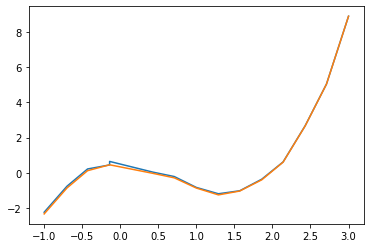

In [10]:
plt.plot(x, y)
y1 = [0]*len(y)
for i in range(len(x)):
  y1[i] = np.dot(design(x[i], M), const(M))
plt.plot(x, y1)


##Сравнение с полиномами других степеней

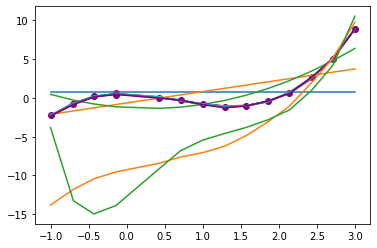

In [11]:
for j in range(0, len(x)):
  for i in range(len(x)):
    y1[i] = np.dot(design(x[i], j), const(j))
  if j == M:
    plt.plot(x, y1, color= 'purple')
  elif j == 3:
    plt.plot(x, y1, color= 'black')
  else:
    plt.plot(x, y1)

plt.scatter(x, y, color='purple')

##Решение с использованием QR-разложения

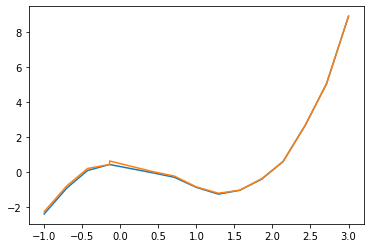

In [13]:
X = [0]*len(x)
for i in range(len(X)):
  X[i] = design(x[i], M)

q, r = np.linalg.qr(X)

C = np.linalg.inv(np.transpose(r)@r)@np.transpose(X)@y
plt.plot(x, X@C)
plt.plot(x, y)
